In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('data_preprocess.csv')

In [3]:
# Extract features and labels
X = df['processed_text']
y = df['label']

In [229]:
# Convert text data to Bag-of-Words features
vectorizer = CountVectorizer(max_features=4750)
X_bow = vectorizer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state=123)


In [231]:
# # Convert text data to TF-IDF features
# vectorizer = TfidfVectorizer()
# X_tfidf = vectorizer.fit_transform(X)

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [233]:
# Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}\n")

Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.81      0.81      4554
     neutral       0.57      0.52      0.55      3043
    positive       0.82      0.86      0.84      6117

    accuracy                           0.77     13714
   macro avg       0.74      0.73      0.73     13714
weighted avg       0.76      0.77      0.77     13714

Accuracy: 0.7687035146565554



In [234]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def score_metrics(actual, predicted):
    labels = ['negative','neutral','positive']  
    print(classification_report(actual, predicted, target_names=labels))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

              precision    recall  f1-score   support

    negative       0.82      0.81      0.81      4554
     neutral       0.57      0.52      0.55      3043
    positive       0.82      0.86      0.84      6117

    accuracy                           0.77     13714
   macro avg       0.74      0.73      0.73     13714
weighted avg       0.76      0.77      0.77     13714



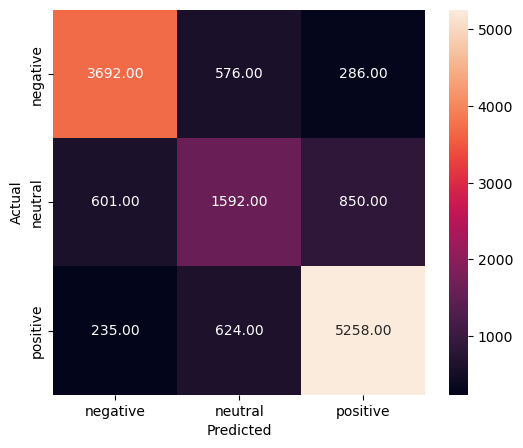

In [235]:
#check the metrics
import sklearn.metrics as metrics
score_metrics(y_test, y_pred_lr)

In [145]:
# Naive Bayes
print("Training Naive Bayes...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}\n")

Training Naive Bayes...

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.76      0.69      4554
     neutral       0.46      0.30      0.37      3043
    positive       0.73      0.75      0.74      6117

    accuracy                           0.65     13714
   macro avg       0.61      0.60      0.60     13714
weighted avg       0.64      0.65      0.64     13714

Accuracy: 0.6542948811433571



              precision    recall  f1-score   support

    negative       0.64      0.76      0.69      4554
     neutral       0.46      0.30      0.37      3043
    positive       0.73      0.75      0.74      6117

    accuracy                           0.65     13714
   macro avg       0.61      0.60      0.60     13714
weighted avg       0.64      0.65      0.64     13714



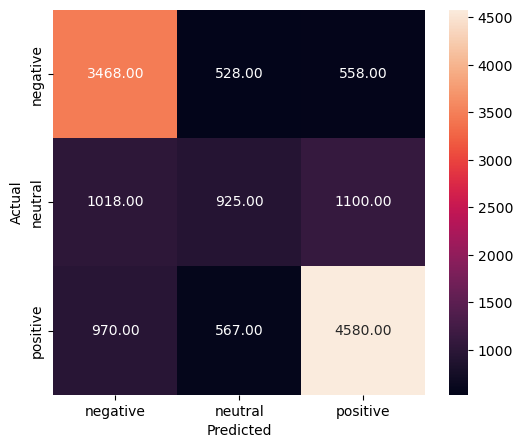

In [147]:
score_metrics(y_test, y_pred_nb)

In [149]:
# Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")

Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.77      0.76      4554
     neutral       0.63      0.48      0.54      3043
    positive       0.77      0.84      0.80      6117

    accuracy                           0.74     13714
   macro avg       0.72      0.70      0.70     13714
weighted avg       0.73      0.74      0.73     13714

Accuracy: 0.7385153857372029



              precision    recall  f1-score   support

    negative       0.75      0.77      0.76      4554
     neutral       0.63      0.48      0.54      3043
    positive       0.77      0.84      0.80      6117

    accuracy                           0.74     13714
   macro avg       0.72      0.70      0.70     13714
weighted avg       0.73      0.74      0.73     13714



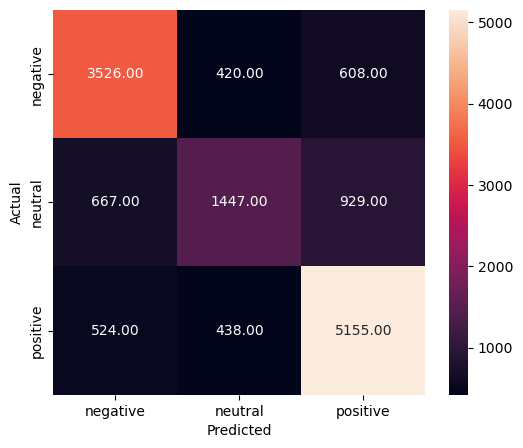

In [153]:
score_metrics(y_test, y_pred_rf)

In [150]:
from sklearn.svm import LinearSVC

print("Training Support Vector Machine (LinearSVC)...")
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSupport Vector Machine (LinearSVC) Classification Report:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")


Training Support Vector Machine (LinearSVC)...

Support Vector Machine (LinearSVC) Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.82      0.81      4554
     neutral       0.57      0.46      0.51      3043
    positive       0.81      0.87      0.84      6117

    accuracy                           0.76     13714
   macro avg       0.73      0.72      0.72     13714
weighted avg       0.75      0.76      0.75     13714

Accuracy: 0.7616304506343882



              precision    recall  f1-score   support

    negative       0.79      0.82      0.81      4554
     neutral       0.57      0.46      0.51      3043
    positive       0.81      0.87      0.84      6117

    accuracy                           0.76     13714
   macro avg       0.73      0.72      0.72     13714
weighted avg       0.75      0.76      0.75     13714



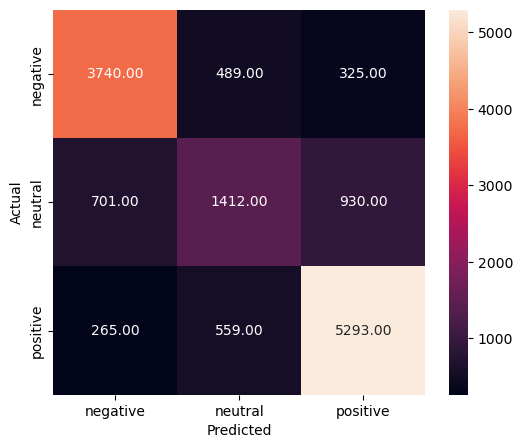

In [155]:
score_metrics(y_test, y_pred_svm)

In [157]:
# XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_bow, y_encoded, test_size=0.2, random_state=42)
print("Training XGBoost...")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}\n")

Training XGBoost...


C:\Users\happy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.73      0.75      3087
     neutral       0.59      0.49      0.54      2036
    positive       0.76      0.86      0.81      4020

    accuracy                           0.73      9143
   macro avg       0.71      0.69      0.70      9143
weighted avg       0.73      0.73      0.73      9143

Accuracy: 0.7347697692223559



              precision    recall  f1-score   support

    negative       0.78      0.73      0.75      3087
     neutral       0.59      0.49      0.54      2036
    positive       0.76      0.86      0.81      4020

    accuracy                           0.73      9143
   macro avg       0.71      0.69      0.70      9143
weighted avg       0.73      0.73      0.73      9143



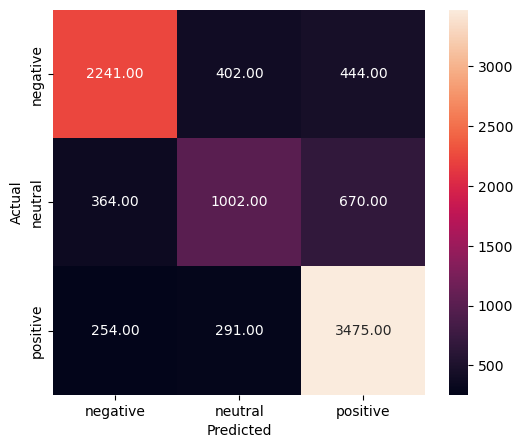

In [159]:
score_metrics(y_test, y_pred_xgb)

In [161]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
], voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
print(classification_report(y_test, y_pred_ensemble))

C:\Users\happy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:10:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3087
           1       0.67      0.50      0.57      2036
           2       0.80      0.89      0.85      4020

    accuracy                           0.78      9143
   macro avg       0.76      0.74      0.74      9143
weighted avg       0.77      0.78      0.77      9143



              precision    recall  f1-score   support

    negative       0.80      0.82      0.81      3087
     neutral       0.67      0.50      0.57      2036
    positive       0.80      0.89      0.85      4020

    accuracy                           0.78      9143
   macro avg       0.76      0.74      0.74      9143
weighted avg       0.77      0.78      0.77      9143



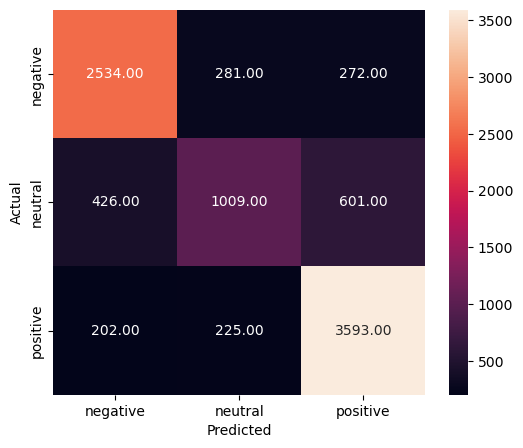

In [163]:
score_metrics(y_test, y_pred_ensemble)

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Define the ensemble model with an alternative combination
ensemble_model_alt = VotingClassifier(
    estimators=[
        ('svc', LinearSVC(random_state=42)),
        ('nb', MultinomialNB()),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ],
    voting='hard'  # Use hard voting for diversity
)

# Train the alternative ensemble model
print("Training Alternative Ensemble Model...")
ensemble_model_alt.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble_alt = ensemble_model_alt.predict(X_test)
print("\nAlternative Ensemble Model Classification Report:")
print(classification_report(y_test, y_pred_ensemble_alt))
print(f"Alternative Ensemble Model Accuracy: {accuracy_score(y_test, y_pred_ensemble_alt):.4f}")


Training Alternative Ensemble Model...


C:\Users\happy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Alternative Ensemble Model Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.80      0.77      3087
     neutral       0.63      0.41      0.49      2036
    positive       0.79      0.86      0.82      4020

    accuracy                           0.74      9143
   macro avg       0.71      0.69      0.69      9143
weighted avg       0.73      0.74      0.73      9143

Alternative Ensemble Model Accuracy: 0.7426


In [31]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the ensemble model with Gradient Boosting
ensemble_model_gb = VotingClassifier(
    estimators=[
        ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('lr', LogisticRegression(max_iter=2000, random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ],
    voting='soft'  # Use soft voting for better probability averaging
)

# Train the ensemble model
print("Training Ensemble Model with Gradient Boosting...")
ensemble_model_gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble_gb = ensemble_model_gb.predict(X_test)
print("\nEnsemble Model with Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_ensemble_gb))
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, y_pred_ensemble_gb):.4f}")


Training Ensemble Model with Gradient Boosting...


C:\Users\happy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Ensemble Model with Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.79      0.79      3087
     neutral       0.64      0.43      0.51      2036
    positive       0.77      0.90      0.83      4020

    accuracy                           0.76      9143
   macro avg       0.73      0.71      0.71      9143
weighted avg       0.75      0.76      0.75      9143

Ensemble Model Accuracy: 0.7569


In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=20,random_state=42)
print("Training Decision Tree Classifier...")
decision_tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = decision_tree_model.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"Decision Tree Classifier Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")


Training Decision Tree Classifier...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.65      0.58      3087
           1       0.38      0.03      0.05      2036
           2       0.58      0.74      0.65      4020

    accuracy                           0.55      9143
   macro avg       0.49      0.47      0.43      9143
weighted avg       0.52      0.55      0.49      9143

Decision Tree Classifier Accuracy: 0.5535


In [171]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define an ensemble model with Decision Tree
ensemble_model_dt = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
        ('lr', LogisticRegression(max_iter=2000, random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ],
    voting='soft'
)

# Train the ensemble model
print("Training Ensemble Model with Decision Tree...")
ensemble_model_dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble_dt = ensemble_model_dt.predict(X_test)
print("\nEnsemble Model with Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_ensemble_dt))
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, y_pred_ensemble_dt):.4f}")


Training Ensemble Model with Decision Tree...


C:\Users\happy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:26:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Ensemble Model with Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      3087
           1       0.65      0.40      0.50      2036
           2       0.77      0.90      0.83      4020

    accuracy                           0.76      9143
   macro avg       0.74      0.71      0.71      9143
weighted avg       0.75      0.76      0.75      9143

Ensemble Model Accuracy: 0.7627


In [217]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,      # Number of boosting stages
    learning_rate=0.1,     # Step size shrinkage
    max_depth=10,           # Maximum depth of the individual estimators
    random_state=42        # Random seed for reproducibility
)
print("Training Gradient Boosting Classifier...")
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")


Training Gradient Boosting Classifier...

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      3087
           1       0.59      0.47      0.53      2036
           2       0.74      0.86      0.80      4020

    accuracy                           0.72      9143
   macro avg       0.70      0.68      0.69      9143
weighted avg       0.72      0.72      0.72      9143

Gradient Boosting Accuracy: 0.7242


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create Logistic Regression and Random Forest models
lr_model = LogisticRegression(max_iter=2000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define an ensemble model with both Logistic Regression and Random Forest
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model), 
        ('rf', rf_model)
    ],
    voting='soft'  # Soft voting (use predicted probabilities for majority)
)

# Train the ensemble model
print("Training Ensemble Model with Logistic Regression + Random Forest...")
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test)
print("\nEnsemble Model with Logistic Regression + Random Forest Classification Report:")
print(classification_report(y_test, y_pred_ensemble))
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")


Training Ensemble Model with Logistic Regression + Random Forest...

Ensemble Model with Logistic Regression + Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3087
           1       0.65      0.51      0.57      2036
           2       0.82      0.89      0.85      4020

    accuracy                           0.79      9143
   macro avg       0.76      0.75      0.75      9143
weighted avg       0.78      0.79      0.78      9143

Ensemble Model Accuracy: 0.7874


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create the individual models
lr_model = LogisticRegression(max_iter=2000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Linear SVM with probability estimates

# Define the ensemble model using Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('svm', svm_model)
    ],
    voting='soft'  # Soft voting (use predicted probabilities for majority)
)

# Train the ensemble model
print("Training Ensemble Model with Logistic Regression + Random Forest + SVM (Linear)...")
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test)
print("\nEnsemble Model with Logistic Regression + Random Forest + SVM (Linear) Classification Report:")
print(classification_report(y_test, y_pred_ensemble))
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")


Training Ensemble Model with Logistic Regression + Random Forest + SVM (Linear)...

Ensemble Model with Logistic Regression + Random Forest + SVM (Linear) Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3087
           1       0.64      0.53      0.58      2036
           2       0.83      0.89      0.86      4020

    accuracy                           0.79      9143
   macro avg       0.76      0.75      0.75      9143
weighted avg       0.78      0.79      0.78      9143

Ensemble Model Accuracy: 0.7898


              precision    recall  f1-score   support

    negative       0.82      0.83      0.82      3087
     neutral       0.64      0.53      0.58      2036
    positive       0.83      0.89      0.86      4020

    accuracy                           0.79      9143
   macro avg       0.76      0.75      0.75      9143
weighted avg       0.78      0.79      0.78      9143



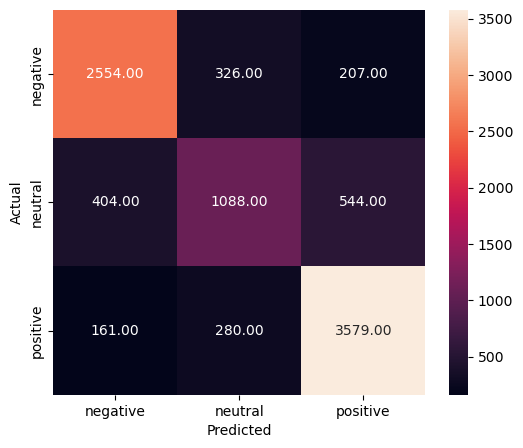

In [187]:
score_metrics(y_test, y_pred_ensemble)

In [209]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize base models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('svm', svm_model)
    ],
    voting='soft'  # Use soft voting for probability-based combination
)

# Train ensemble model
print("Training Ensemble Model...")
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test)
print("\nEnsemble Model Classification Report:")
print(classification_report(y_test, y_pred_ensemble))
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")


Training Ensemble Model...

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3087
           1       0.64      0.53      0.58      2036
           2       0.83      0.89      0.86      4020

    accuracy                           0.79      9143
   macro avg       0.76      0.75      0.75      9143
weighted avg       0.78      0.79      0.78      9143

Accuracy: 0.7898


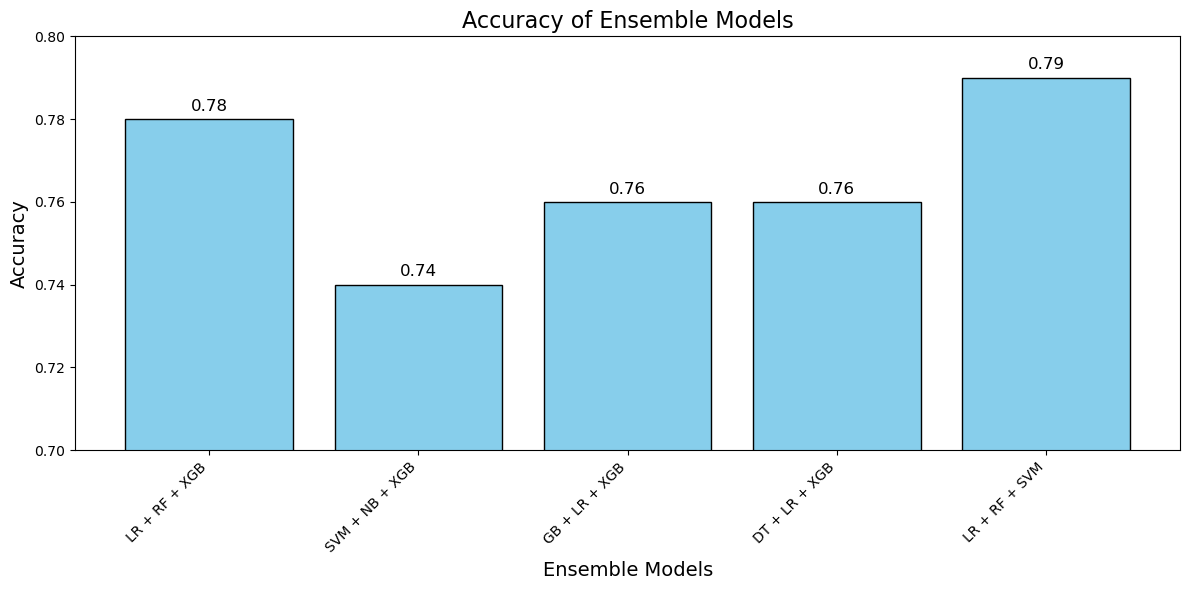

In [211]:
import matplotlib.pyplot as plt

# Data for the bar chart
models = [
    "LR + RF + XGB",
    "SVM + NB + XGB",
    "GB + LR + XGB",
    "DT + LR + XGB",
    "LR + RF + SVM"
]
accuracies = [0.78, 0.74, 0.76, 0.76, 0.79]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Accuracy of Ensemble Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Ensemble Models', fontsize=14)
plt.ylim(0.7, 0.8)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.002, 
             f"{accuracy:.2f}", ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


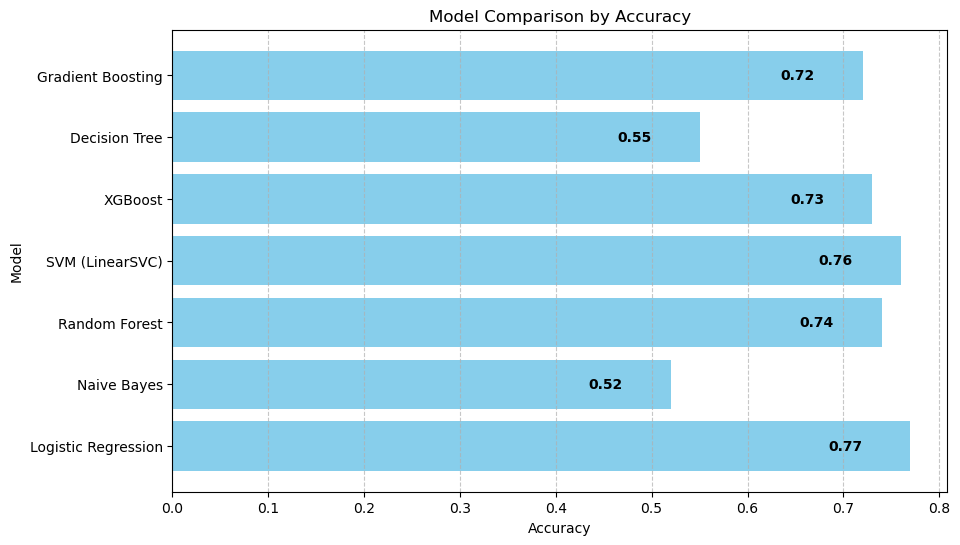

In [239]:
import matplotlib.pyplot as plt

# Data for the models and their accuracies
models = ["Logistic Regression", "Naive Bayes", "Random Forest", "SVM (LinearSVC)", "XGBoost", "Decision Tree", "Gradient Boosting"]
accuracies = [0.77, 0.52, 0.74, 0.76, 0.73, 0.55, 0.72]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color='skyblue')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Comparison by Accuracy')

# Add grid lines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Display the accuracy numbers on the bars
for bar in bars:
    plt.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='right', color='black', fontweight='bold')

# Display the plot
plt.show()
